# First Project: How to Build a Book Recommendation System

https://www.analyticsvidhya.com/blog/2021/06/build-book-recommendation-system-unsupervised-learning-project/

Raghav Agrawal — Updated On July 26th, 2022

Every consumer Internet company requires a recommendation system like Netflix, Youtube, a news feed, etc.

A recommendation engine is a class of machine learning which offers relevant suggestions to the customer.

Before the recommendation system, the major tendency to buy was to take a suggestion from friends. But Now Google knows what news you will read, Youtube knows what type of videos you will watch based on your search history, watch history, or purchase history.

A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.


https://colab.research.google.com/github/syedsharin/Book-Recommendation-System-Project/blob/main/Book_Recommendation_System_Capstone_Project_4.ipynb

## Types Of Recommendation System

A recommendation system is usually built using 3 techniques which are content-based filtering, collaborative filtering, and a combination of both.

### 1) Content-Based Filtering

The algorithm recommends a product that is similar to those which used as watched. In simple words, In this algorithm, we try to find finding item look alike. For example, a person likes to watch Sachin Tendulkar shots, so he may like watching Ricky Ponting shots too because the two videos have similar tags and similar categories.

Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

### 2) Collaborative-based Filtering

Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user.

Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

### 3) Hybrid Filtering Method

It is basically a combination of both the above methods. It is a too complex model which recommends product based on your history as well based on similar users like you.

There are some organizations that use this method like Facebook which shows news which is important for you and for others also in your network and the same is used by Linkedin too.

### Book Recommendation System

A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.

In this article, we will use the Collaborative based filtering method to build a book recommender system.

### Practical Implementation of Recommendation System

#### Dataset Description
we have 3 files in our dataset which is extracted from some books selling websites.

Books – first are about books which contain all the information related to books like an author, title, publication year, etc.
Users – The second file contains registered user’s information like user id, location.
ratings –  Ratings contain information like which user has given how much rating to which book.
So based on all these three files we can build a powerful collaborative filtering model. let’s get started.

In [119]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [120]:
books = pd.read_csv("BX-Books.csv", sep=';', encoding="latin-1", on_bad_lines = "skip")
print(books.head(3))

         ISBN            Book-Title           Book-Author Year-Of-Publication  \
0  0195153448   Classical Mythology    Mark P. O. Morford                2002   
1  0002005018          Clara Callan  Richard Bruce Wright                2001   
2  0060973129  Decision in Normandy          Carlo D'Este                1991   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2          HarperPerennial  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://image

In [121]:
users = pd.read_csv("BX-Users.csv", sep=';', encoding="latin-1", on_bad_lines = "skip")
print(users.head(3))

   User-ID                         Location   Age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN


In [122]:
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding="latin-1", on_bad_lines='skip')
print(ratings.head(3))

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0


### Preprocessing Data

Now in the books file, we have some extra columns which are not required for our task like image URLs. And we will rename the columns of each file as the name of the column contains space, and uppercase letters so we will correct as to make it easy to use.

In [123]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)

In [124]:
print(books.head(3))

         ISBN                 title                author  year  \
0  0195153448   Classical Mythology    Mark P. O. Morford  2002   
1  0002005018          Clara Callan  Richard Bruce Wright  2001   
2  0060973129  Decision in Normandy          Carlo D'Este  1991   

                 publisher  
0  Oxford University Press  
1    HarperFlamingo Canada  
2          HarperPerennial  


In [125]:
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
print(users.head(3))

   user_id                         location   age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN


In [126]:
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)
print(ratings.head(3))

   user_id        ISBN  rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0


In [127]:
books.head()

ISBN                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author  year                   publisher  
0    Mark P. O. Morford  2002     Oxford University Press  
1  Richard Bruce Wright  2001       HarperFlamingo Canada  
2          Carlo D'Este  1991             HarperPerennial  
3      Gina Bari Kolata  1999        Farrar Straus Giroux  
4       E. J. W. Barber  1999  W. W. Norton &amp; Company

In [128]:
books.shape

(271360, 5)

In [129]:
users.shape

(278858, 3)

In [130]:
ratings.shape

(1149780, 3)

The dataset is reliable and can consider as a large dataset. we have 271360 books data and total registered users on the website are approximately 278000 and they have given near about 11 lakh rating. hence we can say that the dataset we have is nice and reliable.

### Approach to a problem statement

We do not want to find a similarity between users or books. we want to do that If there is user A who has read and liked x and y books, And user B has also liked this two books and now user A has read and liked some z book which is not read by B so we have to recommend z book to user B. This is what collaborative filtering is.

So this is achieved using Matrix Factorization, we will create one matrix where columns will be users and indexes will be books and value will be rating. Like we have to create a Pivot table.

### A big flaw with a problem statement in the dataset

If we take all the books and all the users for modeling, Don’t you think will it create a problem? So what we have to do is we have to decrease the number of users and books because we cannot consider a user who has only registered on the website or has only read one or two books. On such a user, we cannot rely to recommend books to others because we have to extract knowledge from data. So what we will limit this number and we will take a user who has rated at least 200 books and also we will limit books and we will take only those books which have received at least 50 ratings from a user.

### Exploratory Data Analysis

So let’s get with analysis and prepare the dataset as we discussed for modeling. let us see how many users have given ratings and extract those users who have given more than 200 ratings.

In [131]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

### Step-1) Extract users and ratings of more than 200

when you run the above code we can see only 105283 peoples have given a rating among 278000. Now we will extract the user ids who have given more than 200 ratings and when we will have user ids we will extract the ratings of only this user id from the rating dataframe.

In [132]:
x = ratings['user_id'].value_counts() > 200

In [133]:
y = x[x].index  #user_ids

In [134]:
print(y.shape)

(899,)


In [135]:
ratings = ratings[ratings['user_id'].isin(y)]

### step-2) Merge ratings with books

So 900 users are there who have given 5.2 lakh rating and this we want. Now we will merge ratings with books on basis of ISBN so that we will get the rating of each user on each book id and the user who has not rated that book id the value will be zero.

In [136]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

user_id        ISBN  rating  \
0   277427  002542730X      10   
1     3363  002542730X       0   
2    11676  002542730X       6   
3    12538  002542730X      10   
4    13552  002542730X       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
2  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
3  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
4  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   

                   publisher  
0  John Wiley &amp; Sons Inc  
1  John Wiley &amp; Sons Inc  
2  John Wiley &amp; Sons Inc  
3  John Wiley &amp; Sons Inc  
4  John Wiley &amp; Sons Inc

In [137]:
rating_with_books.shape

(487671, 7)

### step-3) Extract books that have received more than 50 ratings.

Now dataframe size has decreased and we have 4.8 lakh because when we merge the dataframe, all the book id-data we were not having. Now we will count the rating of each book so we will group data based on title and aggregate based on rating.

In [138]:
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
number_rating

title  rating
0        A Light in the Storm: The Civil War Diary of ...       2
1                                   Always Have Popsicles       1
2                    Apple Magic (The Collector's series)       1
3        Beyond IBM: Leadership Marketing and Finance ...       1
4        Clifford Visita El Hospital (Clifford El Gran...       1
...                                                   ...     ...
160264  Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...       3
160265                                      Ã?Â?lpiraten.       1
160266                     Ã?Â?rger mit Produkt X. Roman.       1
160267                              Ã?Â?stlich der Berge.       1
160268                                  Ã?Â?thique en toc       1

[160269 rows x 2 columns]

In [139]:
number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)

In [140]:
final_rating = rating_with_books.merge(number_rating, on='title')
final_rating

user_id        ISBN  rating  \
0        277427  002542730X      10   
1          3363  002542730X       0   
2         11676  002542730X       6   
3         12538  002542730X      10   
4         13552  002542730X       0   
...         ...         ...     ...   
487666   275970  1892145022       0   
487667   275970  1931868123       0   
487668   275970  3411086211      10   
487669   275970  3829021860       0   
487670   275970  4770019572       0   

                                                    title  \
0       Politically Correct Bedtime Stories: Modern Ta...   
1       Politically Correct Bedtime Stories: Modern Ta...   
2       Politically Correct Bedtime Stories: Modern Ta...   
3       Politically Correct Bedtime Stories: Modern Ta...   
4       Politically Correct Bedtime Stories: Modern Ta...   
...                                                   ...   
487666                                   Here Is New York   
487667  There's a Porcupine in My Outhouse: Misadventu...   
487668                                         Die Biene.   
487669                                     The Penis Book   
487670                                            Musashi   

                               author  year  \
0                   James Finn Garner  1994   
1                   James Finn Garner  1994   
2                   James Finn Garner  1994   
3                   James Finn Garner  1994   
4                   James Finn Garner  1994   
...                               ...   ...   
487666                    E. B. White  1999   
487667                   Mike Tougias  2002   
487668  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt  1993   
487669                   Joseph Cohen  1999   
487670                 Eiji Yoshikawa  1995   

                                   publisher  number_of_ratings  
0                  John Wiley &amp; Sons Inc                 82  
1                  John Wiley &amp; Sons Inc                 82  
2                  John Wiley &amp; Sons Inc                 82  
3                  John Wiley &amp; Sons Inc                 82  
4                  John Wiley &amp; Sons Inc                 82  
...                                      ...                ...  
487666                       Little Bookroom                  1  
487667                    Capital Books (VA)                  1  
487668  Bibliographisches Institut, Mannheim                  1  
487669                              Konemann                  1  
487670          Kodansha International (JPN)                  1  

[487671 rows x 8 columns]

In [141]:
final_rating.shape

(487671, 8)

In [142]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]

In [143]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

we have to drop duplicate values because if the same user has rated the same book multiple times so it will create a problem. Finally, we have a dataset with that user who has rated more than 200 books and books that received more than 50 ratings. the shape of the final dataframe is 59850 rows and 8 columns.

### Step-4) Create Pivot Table

As we discussed above we will create a pivot table where columns will be user ids, the index will be book title and the value is ratings. And the user id who has not rated any book will have value as NAN so impute it with zero.

In [144]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")

In [145]:
book_pivot.fillna(0, inplace=True)

We can see the more than 11 users have removed out because their ratings were on those books which do not receive more than 50 ratings so they are moved out of the picture.

## Modeling

We have prepared our dataset for modeling. we will use the nearest neighbors algorithm which is the same as K nearest which is used for clustering based on euclidian distance.

But here in the pivot table, we have lots of zero values and on clustering, this computing power will increase to calculate the distance of zero values so we will convert the pivot table to the sparse matrix and then feed it to the model.

In [146]:
from scipy.sparse import csr_matrix

book_sparse = csr_matrix(book_pivot)

In [147]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

Now we will train the nearest neighbors algorithm. here we need to specify an algorithm which is brute means find the distance of every point to every other point.

In [148]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

Let’s make a prediction and see whether it is suggesting books or not. we will find the nearest neighbors to the input book id and after that, we will print the top 5 books which are closer to those books. It will provide us distance and book id at that distance. let us pass harry potter which is at 237 indexes.

In [150]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))

let us print all the suggested books.

In [151]:
# To print the title of book

for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


hence, we have successfully built a book recommendation system.

#### End Notes
Hurray! We have to build a reliable Book Recommendation system And you can further modify it and convert it to an end-end project. This is a wonderful Unsupervised learning project where we have done lots of preprocessing and you can explore the dataset more and if you find something more interesting please share it in the comment box.

# Second Project

### Problem Statement
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

In [179]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# <font color='blue'>**The Data**
<font color='blue'>
The Book-Crossing dataset comprises 3 files.<br>
● Users :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● Books : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.<br>
● Ratings :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [181]:
books = pd.read_csv("BX-Books.csv", sep=';', encoding="latin-1", on_bad_lines = "skip")
print(books.head(3))

         ISBN            Book-Title           Book-Author Year-Of-Publication  \
0  0195153448   Classical Mythology    Mark P. O. Morford                2002   
1  0002005018          Clara Callan  Richard Bruce Wright                2001   
2  0060973129  Decision in Normandy          Carlo D'Este                1991   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2          HarperPerennial  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://image

In [182]:
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding="latin-1", on_bad_lines='skip')
print(ratings.head(3))

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0


In [183]:
users = pd.read_csv("BX-Users.csv", sep=';', encoding="latin-1", on_bad_lines = "skip")
print(users.head(3))

   User-ID                         Location   Age
0        1               nyc, new york, usa   NaN
1        2        stockton, california, usa  18.0
2        3  moscow, yukon territory, russia   NaN


### 1.)Users_Dataset

In [184]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [185]:
missing_values(users)

index  Missing Values  % of Total Values Data_type
0       Age          110762              39.72   float64
1   User-ID               0               0.00     int64
2  Location               0               0.00    object

```
# This is formatted as code
```

<font color='blue'>Age have around 39% missing values. 

**bold text** <font color='blue'> **Age Distribution**

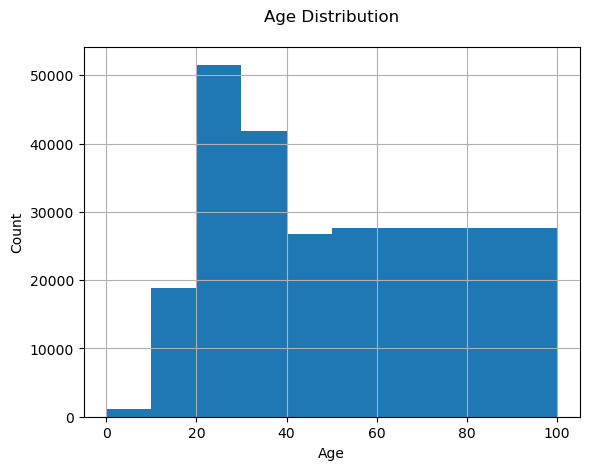

In [186]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are among those in their 20–30s.

Let's check for outliers in age column

Text(0.5, 1.0, 'Find outlier data in Age column')

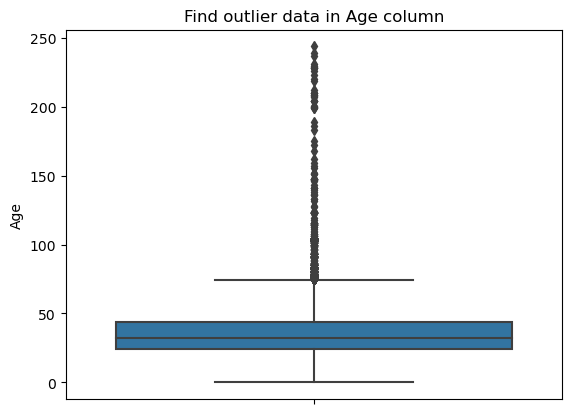

In [187]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [188]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age : 244

Ok we have Outlier data in Age

Let's find our unique value in Location column

In [189]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [190]:
users.Location.nunique()

57339

57339 unique Value it's really hard to understand

So lets create column Country

In [191]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')  

In [192]:
users.Country.nunique()

529

In [193]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [194]:
users.head(2)

User-ID   Age Country
0        1   NaN     usa
1        2  18.0     usa

In [195]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [196]:
users['Country']=users['Country'].astype('str')

In [197]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings Let's correct it.

In [198]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

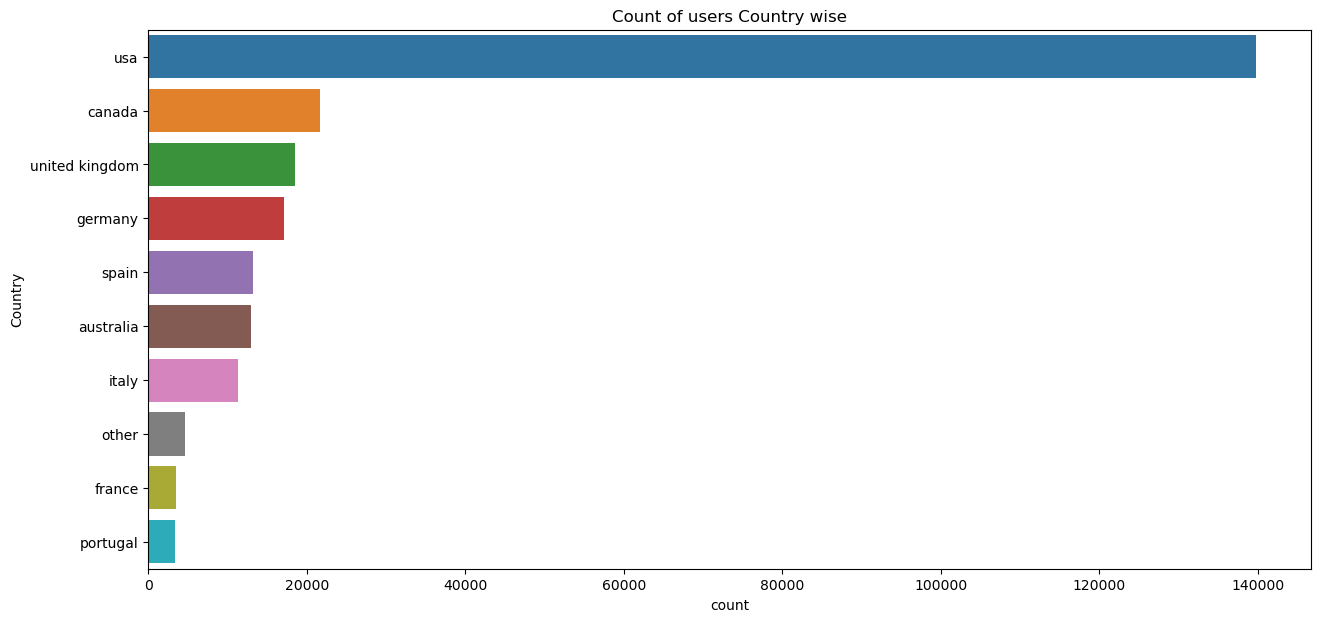

In [199]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

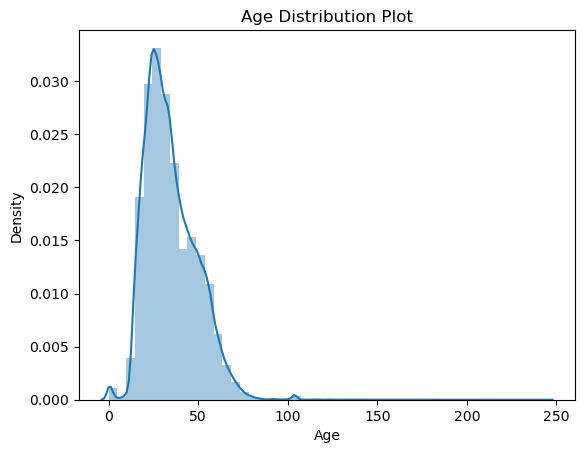

In [200]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [201]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [202]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [203]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [204]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean

In [205]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [206]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

### 2.)Books_Dataset

In [207]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

### Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

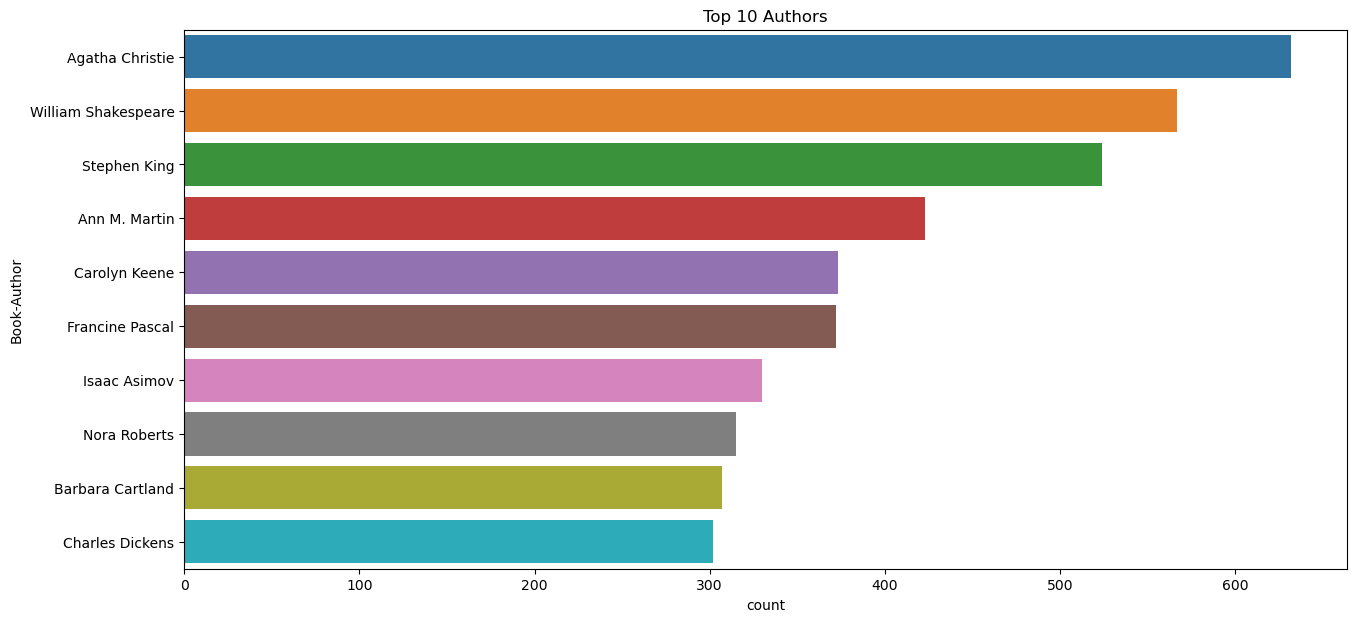

In [208]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

<font color='blue'>Top 10 Publisher which have 

1.   List item

1.   List item
2.   List item


2.   List item

published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

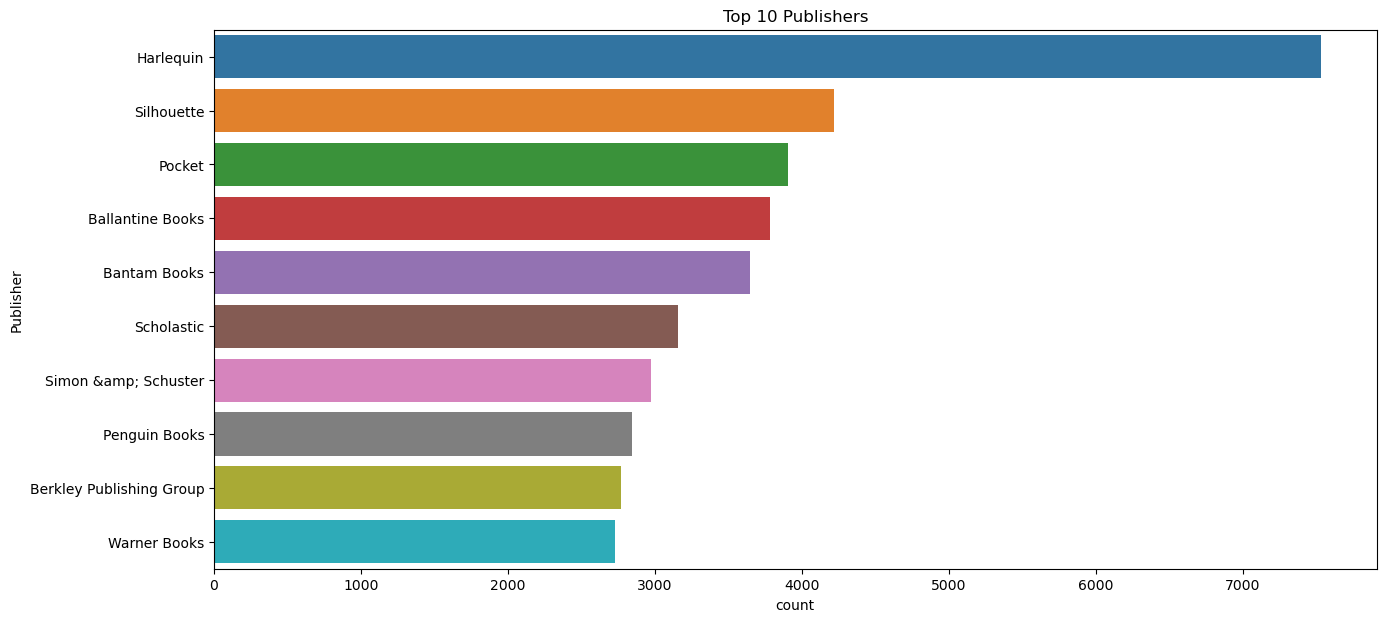

In [209]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [210]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [211]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [212]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

               Book-Author Year-Of-Publication          Publisher  \
209538  Michael Teitelbaum                2000  DK Publishing Inc   
221678       James Buckley                2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [213]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [214]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

ISBN                             Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers   

                            Book-Author Year-Of-Publication  Publisher  \
220731  Jean-Marie Gustave Le ClÃ?Â©zio                2003  Gallimard   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [215]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [216]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [217]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [218]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [219]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae               2002.0   
129037  1931696993  Finders Keepers  Linnea Sinclair               2001.0   

       Publisher  
128890       NaN  
129037       NaN

In [220]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [221]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author  Year-Of-Publication                       Publisher  
118033         NaN               1999.0              Dorling Kindersley  
187689         NaN               1995.0  Edinburgh Financial Publishing

In [222]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [223]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

### 3.)Ratings_Dataset

In [224]:
ratings.head(2)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5

Ratings dataset should have books only which exist in our books dataset

In [225]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [226]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

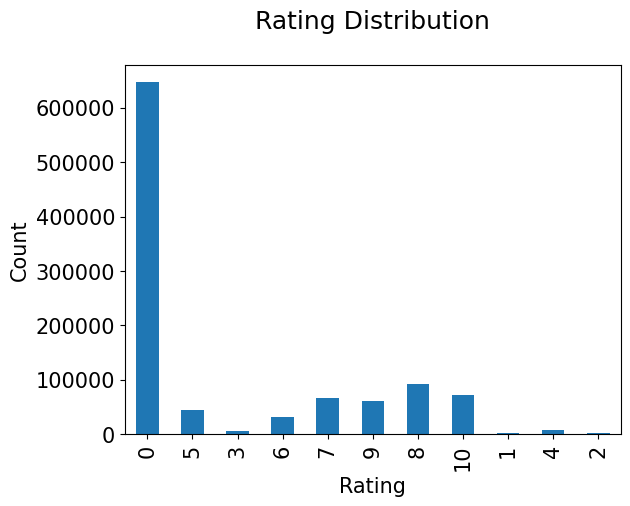

In [227]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [228]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [229]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

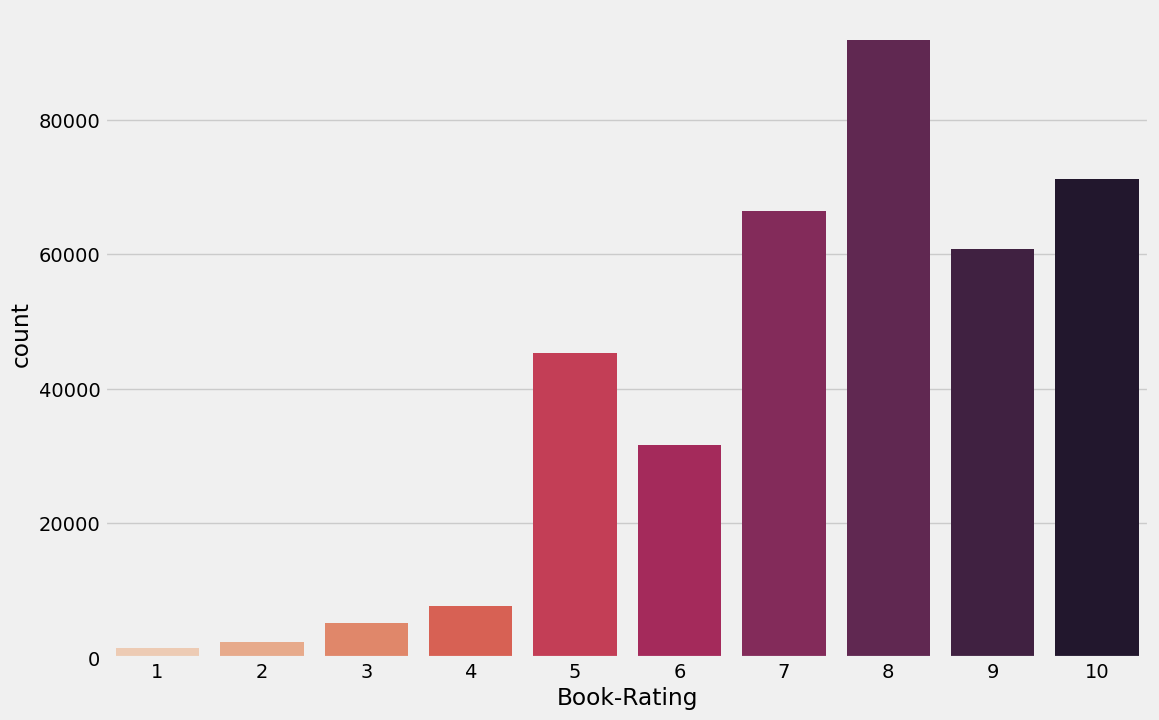

In [230]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

Let's find the top 5 books which are rated by most number of users.

In [231]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

Book-Rating
ISBN                   
0316666343          707
0971880107          581
0385504209          487
0312195516          383
0060928336          320

The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [232]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                       Book-Title    Book-Author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

   Year-Of-Publication      Publisher  
0               2002.0  Little, Brown  
1               2004.0        Too Far  
2               2003.0      Doubleday  
3               1998.0    Picador USA  
4               1997.0      Perennial

The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [233]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [234]:
ratings_explicit.head()

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
1    276726  0155061224            5    5.000000                        1
3    276729  052165615X            3    3.000000                        1
4    276729  0521795028            6    6.000000                        1
8    276744  038550120X            7    7.580247                       81
16   276747  0060517794            9    8.000000                       30

### Merging All Dataset.

In [235]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [236]:
Final_Dataset.head()

User-ID   Age Country        ISBN  Book-Rating  Avg_Rating  \
0        8  33.0  canada  0002005018            5    7.666667   
1    11676  28.0     nan  0002005018            8    7.666667   
2    67544  30.0  canada  0002005018            8    7.666667   
3   116866  32.0   other  0002005018            9    7.666667   
4   123629  33.0  canada  0002005018            9    7.666667   

   Total_No_Of_Users_Rated    Book-Title           Book-Author  \
0                        9  Clara Callan  Richard Bruce Wright   
1                        9  Clara Callan  Richard Bruce Wright   
2                        9  Clara Callan  Richard Bruce Wright   
3                        9  Clara Callan  Richard Bruce Wright   
4                        9  Clara Callan  Richard Bruce Wright   

   Year-Of-Publication              Publisher  
0               2001.0  HarperFlamingo Canada  
1               2001.0  HarperFlamingo Canada  
2               2001.0  HarperFlamingo Canada  
3               2001.0  HarperFlamingo Canada  
4               2001.0  HarperFlamingo Canada

In [237]:
missing_values(Final_Dataset)

index  Missing Values  % of Total Values Data_type
0                   User-ID               0                0.0     int64
1                       Age               0                0.0   float64
2                   Country               0                0.0    object
3                      ISBN               0                0.0    object
4               Book-Rating               0                0.0     int64
5                Avg_Rating               0                0.0   float64
6   Total_No_Of_Users_Rated               0                0.0     int64
7                Book-Title               0                0.0    object
8               Book-Author               0                0.0    object
9       Year-Of-Publication               0                0.0   float64
10                Publisher               0                0.0    object

In [238]:
Final_Dataset.shape

(383842, 11)

## Popularity Based Filtering

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

### Book weighted avg formula:
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]

where,
- v is the number of votes for the books;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the book; and
- C is the mean vote across the whole report.

Now we find the values of v,m,R,C.

In [239]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [240]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    

In [241]:
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)

In [243]:
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [244]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

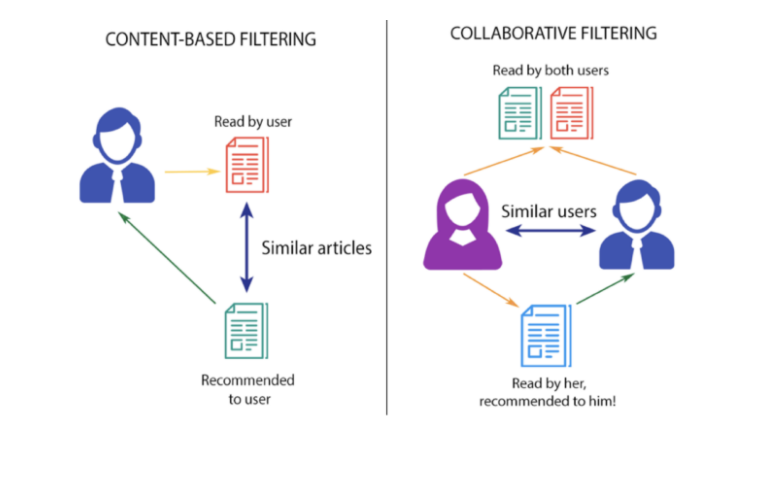

### Model Based Collaborative Filtering Recommender
The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.

Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [245]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.

The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [246]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [247]:
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [248]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


### SVD and NMF models comparison
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [258]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [260]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [261]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [262]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.601700
test_mae     1.239326
fit_time     2.649079
test_time    0.892539
dtype: float64

In [263]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.614263
test_mae     2.232877
fit_time     6.183183
test_time    0.824431
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

### Optimisation of SVD algorithm
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

It is used to find the best setting of parameters:
- n_factors - the number of factors
- n_epochs - the number of iteration of the SGD procedure
- lr_all - the learning rate for all parameters
- reg_all - the regularization term for all parameters

As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [264]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.595327208565066
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


Analysis of Collaborative Filtering model results
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [265]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [266]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

user_id        isbn  actual_rating  pred_rating  impossible  \
4643    173415  0345413881            8.0     8.130634       False   
19463   236399  0786868716           10.0     7.794458       False   
32022    98391  0316341118            8.0     7.871792       False   
14550   234828  042513525X            8.0     7.648463       False   
17364   107784  0394559517            5.0     6.078083       False   

       pred_rating_round   abs_err  
4643                 8.0  0.130634  
19463                8.0  2.205542  
32022                8.0  0.128208  
14550                8.0  0.351537  
17364                6.0  1.078083

Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

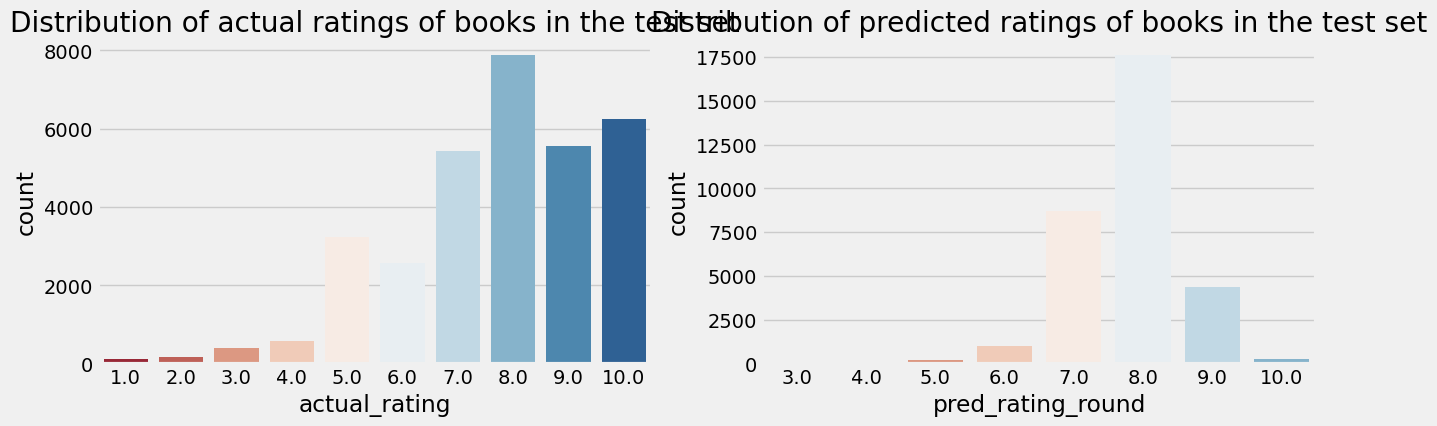

In [267]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

### Absolute error of predicted ratings
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

How good/bad the model is with predicting certain scores? 

As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

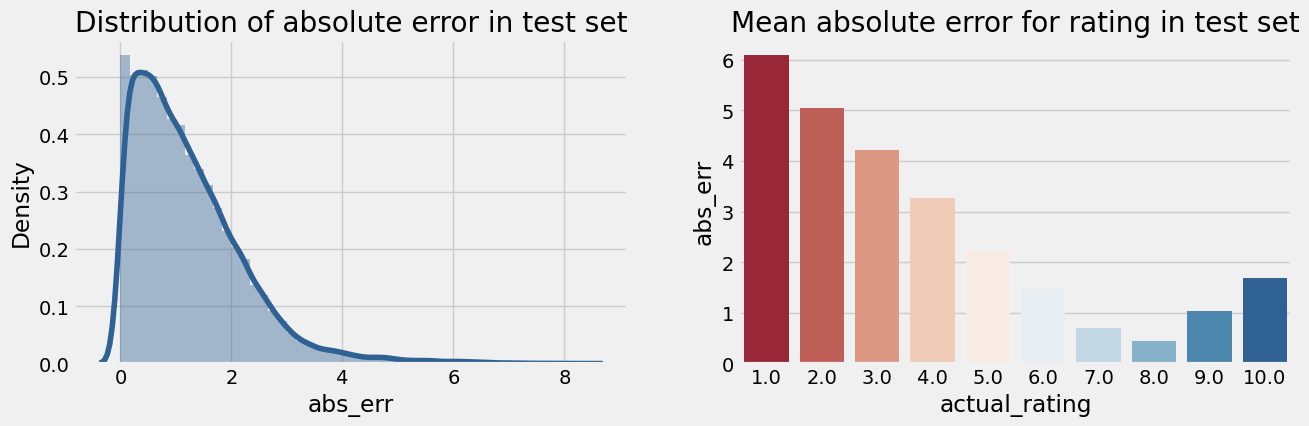

In [268]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

### Analysis of predicted ratings of a particular user
For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [269]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

### Train set: Top rated books

In [270]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
113630   193458  1853260169           10    8.153846                       13   
113587   193458  0142001740            9    8.452769                      307   
113579   193458  0064471071            9    8.733333                       15   
113592   193458  0330352695            9    7.615385                       13   
113619   193458  0671880314            9    8.305556                       36   
113577   193458  0064471055            9    8.545455                       22   
113599   193458  0345431057            9    9.125000                        8   
113580   193458  006447108X            9    8.833333                       18   
113584   193458  0140298479            9    7.539823                      113   
113615   193458  0553258001            9    8.236842                       38   

                                               book_title  pred_rating  
113630        Sense and Sensibility (Wordsworth Classics)          NaN  
113587                            The Secret Life of Bees          NaN  
113579     The Voyage of the Dawn Treader (rack) (Narnia)          NaN  
113592                               Four Letters of Love          NaN  
113619                                   Schindler's List          NaN  
113577  Prince Caspian (rack) : The Return to Narnia (...          NaN  
113599  Slaves in the Family (Ballantine Reader's Circle)          NaN  
113580                                    The Last Battle          NaN  
113584                  Bridget Jones: The Edge of Reason          NaN  
113615                              The Cider House Rules          NaN

### Test set: predicted top rated books

In [271]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
113576   193458  0064471047            9    8.714286                       42   
113583   193458  014011369X            9    9.125000                        8   
113578   193458  0064471063            9    8.518519                       27   
113625   193458  0887308589            8    8.200000                       15   
113626   193458  1559703237            7    8.000000                        4   

                                               book_title  pred_rating  
113576  The Lion, the Witch, and the Wardrobe (The Chr...     8.429160  
113583  And the Band Played on: Politics, People, and ...     8.266546  
113578                              The Horse and His Boy     8.183667  
113625  The Dilbert Principle: A Cubicle's-Eye View of...     8.085943  
113626                         Trying to Save Piggy Sneed     8.040483

### Test set: actual top rated books

In [272]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
113576   193458  0064471047            9    8.714286                       42   
113578   193458  0064471063            9    8.518519                       27   
113581   193458  0064471098            9    8.733333                       15   
113583   193458  014011369X            9    9.125000                        8   
113593   193458  0345342569            9    7.947368                       19   

                                               book_title  pred_rating  
113576  The Lion, the Witch, and the Wardrobe (The Chr...     8.429160  
113578                              The Horse and His Boy     8.183667  
113581                                   The Silver Chair     8.012682  
113583  And the Band Played on: Politics, People, and ...     8.266546  
113593                                       Shoeless Joe     7.801020

## Collaborative Filtering based Recommendation System--(Item-Item Based)

In [273]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [274]:
df_ratings_top.head()

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated
16   276747  0060517794            9    8.000000                       30
19   276747  0671537458            9    7.176471                       17
20   276747  0679776818            8    7.476190                       21
59   276772  0553572369            7    6.625000                        8
61   276772  3499230933           10    7.166667                        6

In [275]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [276]:
df_ratings_top.head()

userID        ISBN  bookRating  Avg_Rating  Total_No_Of_Users_Rated
16  276747  0060517794           9    8.000000                       30
19  276747  0671537458           9    7.176471                       17
20  276747  0679776818           8    7.476190                       21
59  276772  0553572369           7    6.625000                        8
61  276772  3499230933          10    7.166667                        6

## Implementing KNN

In [277]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18549, 13740)


ISBN    0002005018  0002251760  0002558122  0003300277  000617616X  \
userID                                                               
8              5.0         NaN         NaN         NaN         NaN   
17             NaN         NaN         NaN         NaN         NaN   
53             NaN         NaN         NaN         NaN         NaN   
92             NaN         NaN         NaN         NaN         NaN   
99             NaN         NaN         NaN         NaN         NaN   

ISBN    0006480764  000648302X  0006485200  000649840X  0006511767  ...  \
userID                                                              ...   
8              NaN         NaN         NaN         NaN         NaN  ...   
17             NaN         NaN         NaN         NaN         NaN  ...   
53             NaN         NaN         NaN         NaN         NaN  ...   
92             NaN         NaN         NaN         NaN         NaN  ...   
99             NaN         NaN         NaN         NaN         NaN  ...   

ISBN    9500723832  950491036X  9505156642  9505156944  9580464162  \
userID                                                               
8              NaN         NaN         NaN         NaN         NaN   
17             NaN         NaN         NaN         NaN         NaN   
53             NaN         NaN         NaN         NaN         NaN   
92             NaN         NaN         NaN         NaN         NaN   
99             NaN         NaN         NaN         NaN         NaN   

ISBN    958704049X  9681500555  9722016563  9812327975  9871138148  
userID                                                              
8              NaN         NaN         NaN         NaN         NaN  
17             NaN         NaN         NaN         NaN         NaN  
53             NaN         NaN         NaN         NaN         NaN  
92             NaN         NaN         NaN         NaN         NaN  
99             NaN         NaN         NaN         NaN         NaN  

[5 rows x 13740 columns]

In [278]:

n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [279]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [280]:
#checking first few rows
ratings_matrix.head(5)

ISBN    0002005018  0002251760  0002558122  0003300277  000617616X  \
userID                                                               
8                5           0           0           0           0   
17               0           0           0           0           0   
53               0           0           0           0           0   
92               0           0           0           0           0   
99               0           0           0           0           0   

ISBN    0006480764  000648302X  0006485200  000649840X  0006511767  ...  \
userID                                                              ...   
8                0           0           0           0           0  ...   
17               0           0           0           0           0  ...   
53               0           0           0           0           0  ...   
92               0           0           0           0           0  ...   
99               0           0           0           0           0  ...   

ISBN    9500723832  950491036X  9505156642  9505156944  9580464162  \
userID                                                               
8                0           0           0           0           0   
17               0           0           0           0           0   
53               0           0           0           0           0   
92               0           0           0           0           0   
99               0           0           0           0           0   

ISBN    958704049X  9681500555  9722016563  9812327975  9871138148  
userID                                                              
8                0           0           0           0           0  
17               0           0           0           0           0  
53               0           0           0           0           0  
92               0           0           0           0           0  
99               0           0           0           0           0  

[5 rows x 13740 columns]

In [281]:
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [282]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [283]:

combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

userID        ISBN  bookRating             bookTitle
0  276725  034545104X           0  Flesh Tones: A Novel
1    2313  034545104X           5  Flesh Tones: A Novel
2    6543  034545104X           0  Flesh Tones: A Novel
3    8680  034545104X           5  Flesh Tones: A Novel
4   10314  034545104X           9  Flesh Tones: A Novel

In [284]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [285]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [286]:
book_ratingcount.head()

bookTitle  TotalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 4
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Ask Lily (Young Women of Faith: Lily Series, ...                 1
4   Beyond IBM: Leadership Marketing and Finance ...                 1

Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [287]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [288]:
rating_with_totalratingcount.head()

userID        ISBN  bookRating             bookTitle  TotalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60

In [289]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


The median book has been rated only once. Let’s look at the top of the distribution:

In [290]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [291]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [292]:
rating_popular_book.head()

userID        ISBN  bookRating             bookTitle  TotalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60

In [293]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [294]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

### Finding the Nearest Neighbors

In [295]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Test our model and Make few Recommnedations

In [296]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Franny and Zooey:

1: Nine Stories, with distance of 0.8867629832096837:
2: The Bell Jar : A Novel (Perennial Classics), with distance of 0.9031095376507217:
3: A Clockwork Orange (Norton Paperback Fiction), with distance of 0.9289603584644045:
4: Grendel, with distance of 0.9331146877520833:
5: OLD MAN AND THE SEA, with distance of 0.9335429121181444:


In [297]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [298]:
us_canada_user_rating_pivot2.head()

bookTitle  10 Lb. Penalty  16 Lighthouse Road  1984  1st to Die: A Novel  \
userID                                                                     
8                   0.000               0.000 0.000                0.000   
9                   0.000               0.000 0.000                0.000   
14                  0.000               0.000 0.000                0.000   
16                  0.000               0.000 0.000                0.000   
17                  0.000               0.000 0.000                0.000   

bookTitle  2010: Odyssey Two  204 Rosewood Lane  2061: Odyssey Three  \
userID                                                                 
8                      0.000              0.000                0.000   
9                      0.000              0.000                0.000   
14                     0.000              0.000                0.000   
16                     0.000              0.000                0.000   
17                     0.000              0.000                0.000   

bookTitle  24 Hours  2nd Chance  3rd Degree  ...  YOU BELONG TO ME  \
userID                                       ...                     
8             0.000       0.000       0.000  ...             0.000   
9             0.000       0.000       0.000  ...             0.000   
14            0.000       0.000       0.000  ...             0.000   
16            0.000       0.000       0.000  ...             0.000   
17            0.000       0.000       0.000  ...             0.000   

bookTitle  Year of Wonders  You Belong To Me  You Shall Know Our Velocity  \
userID                                                                      
8                    0.000             0.000                        0.000   
9                    0.000             0.000                        0.000   
14                   0.000             0.000                        0.000   
16                   0.000             0.000                        0.000   
17                   0.000             0.000                        0.000   

bookTitle  Young Wives  \
userID                   
8                0.000   
9                0.000   
14               0.000   
16               0.000   
17               0.000   

bookTitle  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
userID                                                                         
8                                                      0.000                   
9                                                      0.000                   
14                                                     0.000                   
16                                                     0.000                   
17                                                     0.000                   

bookTitle  Zoya  \O\" Is for Outlaw"  \
userID                                 
8         0.000                0.000   
9         0.000                0.000   
14        0.000                0.000   
16        0.000                0.000   
17        0.000                0.000   

bookTitle  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
userID                                                                                 
8                                                      0.000                           
9                                                      0.000                           
14                                                     0.000                           
16                                                     0.000                           
17                                                     0.000                           

bookTitle  stardust  
userID               
8             0.000  
9             0.000  
14            0.000  
16            0.000  
17            0.000  

[5 rows x 2444 columns]

In [299]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [300]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [301]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [302]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

## Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)

In [303]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

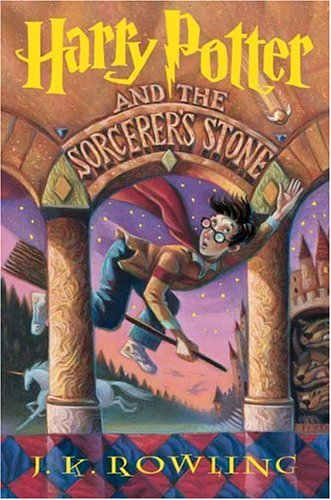

In [305]:
corr_coffey_hands  = corr[coffey_hands]

In [306]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

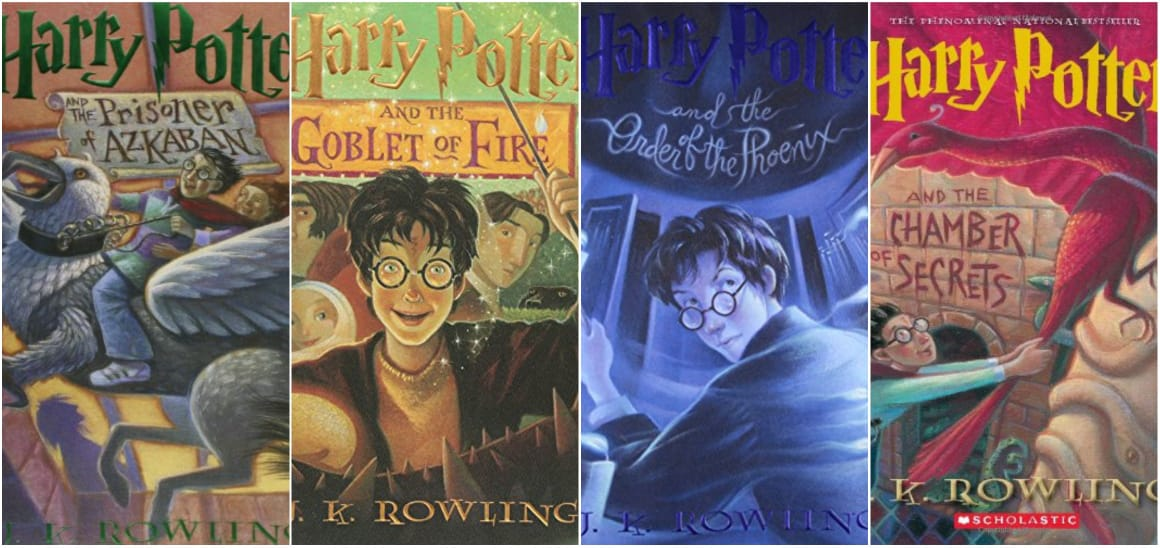

Thats Great!!

## Collaborative Filtering based Recommendation System--(User-Item based)

In [307]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [308]:
ratings_explicit.head()

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
1    276726  0155061224            5       5.000                        1
3    276729  052165615X            3       3.000                        1
4    276729  0521795028            6       6.000                        1
8    276744  038550120X            7       7.580                       81
16   276747  0060517794            9       8.000                       30

In [309]:

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [310]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [311]:
interactions_from_selected_users_df.head(10)

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
0     2033  0030020786            7       7.000                        1
1     2033  0060248025           10       8.767                       30
2     2033  0060256664           10       8.333                        6
3     2033  0060256737           10       9.045                       22
4     2033  0060950536           10       9.400                        5
5     2033  0061020419            7       7.000                        1
6     2033  0061020427            6       6.000                        1
7     2033  0061056278           10       9.000                        2
8     2033  0061056286            8       7.667                        3
9     2033  0061056294            9       7.000                        2

In [312]:
import math

In [313]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


ISBN  User-ID  Book-Rating
0  0000913154   171118        3.170
1  0001046438    23902        3.322
2  000104687X    23902        2.807
3  0001047213    23902        3.322
4  0001047973    23902        3.322

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [316]:
interactions_test_df.head()

ISBN  User-ID  Book-Rating
87596  0879051213    95010        3.000
52630  0515101230   129074        3.000
68434  0679427724    75819        3.170
85835  0843951346   135149        3.322
92752  1551665727   158295        3.170

In [317]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN     0000913154  000104687X  0001047213  0001047973  000104799X  \
User-ID                                                               
2033          0.000       0.000       0.000       0.000       0.000   
2110          0.000       0.000       0.000       0.000       0.000   
2276          0.000       0.000       0.000       0.000       0.000   
4017          0.000       0.000       0.000       0.000       0.000   
4385          0.000       0.000       0.000       0.000       0.000   

ISBN     0001048082  0001053736  0001055607  0001056107  0001845039  ...  \
User-ID                                                              ...   
2033          0.000       0.000       0.000       0.000       0.000  ...   
2110          0.000       0.000       0.000       0.000       0.000  ...   
2276          0.000       0.000       0.000       0.000       0.000  ...   
4017          0.000       0.000       0.000       0.000       0.000  ...   
4385          0.000       0.000       0.000       0.000       0.000  ...   

ISBN     B00007FYKW  B00008RWPV  B00009NDAN  B0000DYXID  B0000T6KHI  \
User-ID                                                               
2033          0.000       0.000       0.000       0.000       0.000   
2110          0.000       0.000       0.000       0.000       0.000   
2276          0.000       0.000       0.000       0.000       0.000   
4017          0.000       0.000       0.000       0.000       0.000   
4385          0.000       0.000       0.000       0.000       0.000   

ISBN     B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
User-ID                                                              
2033          0.000       0.000       0.000       0.000       0.000  
2110          0.000       0.000       0.000       0.000       0.000  
2276          0.000       0.000       0.000       0.000       0.000  
4017          0.000       0.000       0.000       0.000       0.000  
4385          0.000       0.000       0.000       0.000       0.000  

[5 rows x 55743 columns]

In [318]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [319]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [320]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [321]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [322]:
users_items_pivot_matrix.shape

(449, 55743)

In [323]:
U.shape

(449, 15)

In [324]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [325]:
Vt.shape

(15, 55743)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [326]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [327]:
all_user_predicted_ratings.shape

(449, 55743)

In [328]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

2033    2110    2276    4017    4385    5582    6242    6251    \
ISBN                                                                         
0000913154   0.015  -0.001  -0.002   0.001  -0.002  -0.003  -0.003   0.007   
000104687X   0.002  -0.001  -0.002   0.017  -0.001   0.009   0.014   0.007   
0001047213   0.003  -0.001  -0.002   0.020  -0.001   0.010   0.016   0.009   
0001047973   0.003  -0.001  -0.002   0.020  -0.001   0.010   0.016   0.009   
000104799X   0.001   0.000   0.001   0.002   0.000   0.001   0.001   0.002   

            6543    6575    ...  269566  270713  271448  271705  273113  \
ISBN                        ...                                           
0000913154   0.001   0.013  ...   0.001   0.003  -0.002   0.008  -0.012   
000104687X  -0.003   0.016  ...  -0.002   0.013  -0.001   0.014  -0.005   
0001047213  -0.004   0.019  ...  -0.003   0.016  -0.001   0.016  -0.005   
0001047973  -0.004   0.019  ...  -0.003   0.016  -0.001   0.016  -0.005   
000104799X   0.002   0.004  ...   0.001   0.002   0.003   0.001   0.002   

            274061  274301  275970  277427  278418  
ISBN                                                
0000913154   0.001   0.008   0.004   0.011  -0.001  
000104687X  -0.006   0.008   0.002  -0.002   0.005  
0001047213  -0.007   0.009   0.002  -0.003   0.006  
0001047973  -0.007   0.009   0.002  -0.003   0.006  
000104799X   0.002   0.002   0.001   0.001   0.000  

[5 rows x 449 columns]

In [329]:
len(cf_preds_df.columns)

449

In [330]:
global books
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  
0    Mark P. O. Morford             2002.000     Oxford University Press  
1  Richard Bruce Wright             2001.000       HarperFlamingo Canada  
2          Carlo D'Este             1991.000             HarperPerennial  
3      Gina Bari Kolata             1999.000        Farrar Straus Giroux  
4       E. J. W. Barber             1999.000  W. W. Norton &amp; Company

In [359]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [332]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [333]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [334]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

### Let's recommend books to User-Id 69078 and see the results.

In [335]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [336]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  69078
Recommendation for User-ID =  69078
         ISBN                                       Book-Title  recStrength
0  0446310786                            To Kill a Mockingbird        0.843
1  0345370775                                    Jurassic Park        0.798
2  0345361792                          A Prayer for Owen Meany        0.703
3  0316769487                           The Catcher in the Rye        0.657
4  0440214041                                The Pelican Brief        0.646
5  0312966970           Four To Score (A Stephanie Plum Novel)        0.641
6  0440211727                                   A Time to Kill        0.622
7  044021145X                                         The Firm        0.615
8  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel        0.598
9  0553572997                                     The Alienist        0.586


#### Evaluate
In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

#### This evaluation method works as follows:
- For each user
    - For each item the user has interacted in test set
        - Sample 100 other items the user has never interacted.
        - Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        - Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list

### Aggregate the global Top-N accuracy metrics

In [344]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [360]:
'''
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)'''

"\nprint('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')\ncf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)\n\nprint('\nGlobal metrics:\n%s' % cf_global_metrics)\ncf_detailed_results_df.head(10)"

### Conclusion
- In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone and The Secret Life of Bees were very well perceived.
- Majority of the readers were of the age bracket 20-35 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.
- If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.
- Author with the most books was Agatha Christie, William Shakespeare and Stephen King.
- For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .
- Amongst the memory based approach, item-item CF performed better than user-user CF because of lower computation .